In [2]:
import requests

In [3]:
# Endpoint home
response = requests.get('http://127.0.0.1:5001/')
print(response.json())

{'endpoints': {'history': 'GET /history (Query: limit) - Historial de segmentaciones', 'predict_get': 'GET /predict/<id> - Obtener segmentación por ID', 'predict_post': 'POST /predict (Body: image) - Enviar imagen para segmentación', 'predict_random': 'GET /predict/random - Segmentación con imagen aleatoria'}, 'model_loaded': True, 'model_type': '.keras - ResUNet Segmentation', 'status': 'online'}


Status: 200
Respuesta: {'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'mask_base64': '', 'segmentation_id': 1, 'success': True}

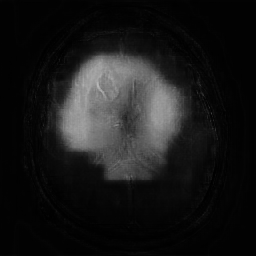

In [4]:
# Endpoint predict

image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_14.tif"

with open(image_path, 'rb') as f:
    response = requests.post(
        'http://127.0.0.1:5001/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

print("Status:", response.status_code)
print("Respuesta:", response.json())

{'date': '2025-12-08T18:06:33.053577', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 1, 'mask_base64': ''}

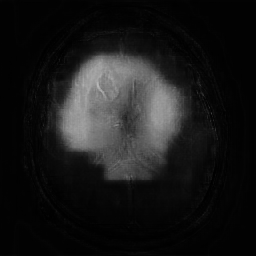

In [6]:
# Endpoint  get predict (get con id)

response = requests.get('http://127.0.0.1:5001/predict/1')
print(response.json())

In [ ]:
# La predicción de la imagen enviada en la celda anterior

# 1. POST - enviar imagen

with open(image_path, 'rb') as f:
    post_response = requests.post(
        'http://127.0.0.1:5001/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

post_result = post_response.json()
print("POST:", post_result)

# 2. GET - consultar la misma predicción automáticamente
prediction_id = post_result['prediction_id']
get_response = requests.get(f'http://127.0.0.1:5001/predict/{prediction_id}') #aquí pondiramos el id de la imagen de la celda anterior
print("GET:", get_response.json())

{'filename': 'TCGA_CS_4941_19960909_20.tif', 'mask_base64': ''}

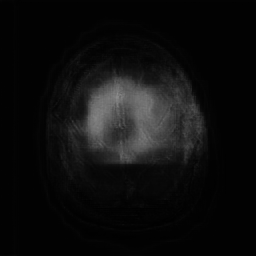

In [7]:
# Endpoint predict random

response = requests.get('http://127.0.0.1:5001/predict/random')
print(response.json())

In [8]:
# Endpoint History

response = requests.get('http://127.0.0.1:5001/history')
print(response.json())

{'count': 1, 'data': [{'date': '2025-12-08T18:06:33.053577', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 1}]}
